In [1]:
# token = 4a775b4a-7f2c-40d5-989b-652c443fcfb0

In [2]:
# GET https://impossible-swallow.glitch.me/name?token={your secret token}

# returns the current name of your bot

# PUT https://impossible-swallow.glitch.me/name {
#   "token": "{your secret token}",
#   "name": "{the new name you want for your bot}"
# }
# changes the name of your bot

# POST https://impossible-swallow.glitch.me/post {
#   "token": "{your secret token}",
#   "text": "{the message you want to post to the channel}",
#   "image": {image url (optional)}
# }

In [3]:


# TERRA                   
# 1 25994U 99068A   19028.62546474 -.00000108  00000-0 -13964-4 0  9997
# 2 25994  98.2076 105.2157 0001501  97.6265 262.5098 14.57116656 16658

In [4]:
import numpy as np

https://ru.wikipedia.org/wiki/TLE

http://celestrak.com/NORAD/elements/

https://github.com/pytroll/pyorbital/blob/master/pyorbital/tests/test_orbital.py

http://licensing.agi.com/stk/



# Part 1

### 1.1) Estimate maximum spatial error in position on Earth surface  if UTC is used instead of UT1

In [5]:
# 15 degree / 60 min
# 1 deg / 4 min
# 0.25 deg / 1 min
# 0.00416666667 / 1 sec
angle = 0.00416666667
h = 35800
R = 6400
error = np.pi * R * angle / 180
print("error in km", "%.1f" % error)

error in km 0.5


### 1.2) Calculate period of a satellite X1 on near circular orbit with altitude 500км


In [30]:
earth_period = 1
G = 6.674*10**(-11)  # N m² kgˉ²
M = 5.972*10**24  # kg
earth_semi_major = 6400
# sat_radius = earth_semi_major + 500
sat_radius = earth_semi_major + 370
sat_radius

6770

In [7]:
orbit_length = 2*np.pi*sat_radius
print("orbit_length, km", "{0:.1f}".format(orbit_length), "%.1f" % orbit_length)

orbit_length, km 42537.2 42537.2


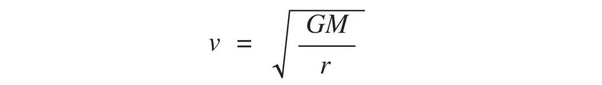

In [8]:
sat_speed = np.sqrt(G*M/(sat_radius*1000))
print("sat_speed, m/sec", "%.1f" % sat_speed)

sat_speed, m/sec 7672.9


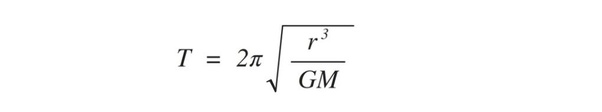

In [9]:
orbit_length = 1000*orbit_length  # meters
period = ((orbit_length)/sat_speed)  # sec
sat_period = period / 60
print("orbit_period, min", "%.1f" % sat_period)

orbit_period, min 92.4


In [10]:
# sat_period = 2*np.pi*np.sqrt(sat_radius**3/(G*M))
# sat_period

### 1.3) Calculate mean velocity of the satellite X1 and mean velocity of its subsatellite point

In [11]:
sat_speed = np.sqrt(G*M/(sat_radius*1000))
print("sat_speed, m/sec", "%.1f" % sat_speed)

sat_speed, m/sec 7672.9


In [56]:
# time is equal
subsat_point_length = 2*np.pi*earth_semi_major
print("subsat_point_length, km", "%.1f" % subsat_point_length)

subsat_point_length, km 40212.4


In [57]:
subsat_point_speed = (1000*subsat_point_length) / (60*sat_period)  # km / min
print("subsat_point_speed, m/sec", "%.1f" % subsat_point_speed)

subsat_point_speed, m/sec 7253.5


### 1.4) Calculate longitudinal distance (km) between two successive ground tracks for X1. a) at equator  b) at 55d. latitude

difference between tracks

prbly it's the distance earth rotated in that period

In [14]:
# 15 degree / 60 min
# 1 deg / 4 min
# 0.25 deg / 1 min
# 0.00416666667 / 1 sec
angle = 0.00416666667
h = 35800
R = 6400
dist_btw_two_ground_tracks = np.pi * R * (60*angle)*sat_period / 180
print("longitudinal distance at equator in km", "%.1f" % dist_btw_two_ground_tracks)

longitudinal distance at equator in km 2580.2


### 1.5) How many imaging GEO satellites are required to cover Earth without gaps in equatorial belt ?

how many arcs

In [15]:
GEO_h = 42164
GEO = 35786

In [16]:
#tangent_line_x = np.sqrt(GEO_h**2 - R**2)
alpha = np.arccos(R/GEO_h)
print("alpha in rad", "%.1f" % alpha)

alpha in rad 1.4


In [17]:
arc_length = R*(2*alpha)
print("arc_length, km", "%.1f" % arc_length)

arc_length, km 18155.8


In [18]:
arcs_in_equator = 2*np.pi*R/arc_length
print("arcs_in_equator", "%.1f" % arcs_in_equator)
print("need three satellites on GEO orbit")

arcs_in_equator 2.2
need three satellites on GEO orbit


# Part 2

For next problems select one satellite from a list: AQUA,TERRA, RADARSAT-2.

Fetch and use a fresh TLE from www.celestrak.com

Ground station and imaging target are located at  
55N.latitude, 37 E.longitude unless specified otherwise

Reference or start of scenario time is  
2019-01-30T00:00:00UTC

https://github.com/pytroll/pyorbital/blob/master/pyorbital/orbital.py

https://github.com/pytroll/pyorbital/blob/master/pyorbital/tests/test_orbital.py

http://celestrak.com/NORAD/elements/

https://docs.google.com/document/d/1_qHbpU1Rq9xvh7Y_159CCZthJZOem5NN2awYLQd5hko/edit



### 2.1) Calculate satellite position at reference time ( Cartesian, lat-lon-alt , topocentric(az,el,range) 

In [19]:
from pyorbital.orbital import Orbital
from datetime import datetime, timedelta
import time

In [20]:
dt = datetime(2019, 1, 30, 0, 0, 0)
dt

datetime.datetime(2019, 1, 30, 0, 0)

In [21]:
line1 = '1 32382U 07061A   19047.12869166  .00000214  00000-0  10000-3 0  9993'
line2 = '2 32382  98.5773  55.8244 0001171  82.6262 350.4330 14.29984888583323'

In [22]:
orb = Orbital("RADARSAT-2",
             line1 = line1, line2 = line2)

In [23]:
# orb = Orbital("AQUA",
#              line1='1 27424U 02022A   19039.92419981  .00000070  00000-0  25584-4 0  9995',
#              line2='2 27424  98.2216 342.6641 0002877  76.0819  15.6033 14.57108406891855')

In [24]:
# utc_time = '2019-01-30 00:00:00'
cart = orb.get_position(dt, normalize=False)
print('cartesian position and velocity are: ')
print("pos: ", cart[0])
print("vel: ", cart[1])

cartesian position and velocity are: 
pos:  [-4257.61638408 -4206.73432558  3942.36847584]
vel:  [-3.81362025 -1.89573259 -6.12418654]


In [25]:
lon, lat, alt = orb.get_lonlatalt(dt)
print('lon, lat, alt are:', lon, lat, alt)

lon, lat, alt are: 95.71127549023225 33.529200848155064 795.3754769591919


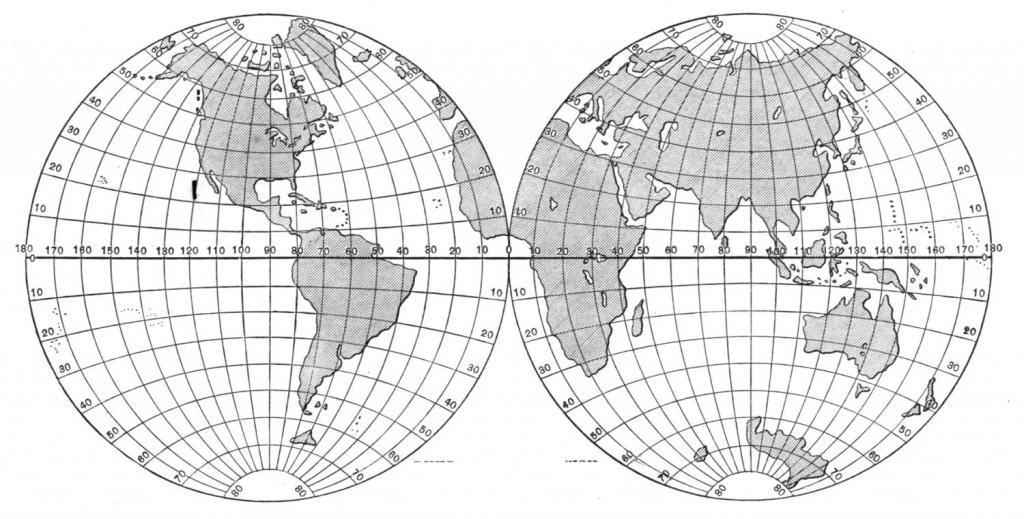

In [26]:
topocentric = orb.get_observer_look(dt, lon, lat, alt)
print('Azimuth is, degree: ', "%.2f" % topocentric[0])
print('Elevation is, degree: ', "%.2f" % topocentric[1])

Azimuth is, degree:  0.00
Elevation is, degree:  -89.84


In [27]:
# sat_range = 

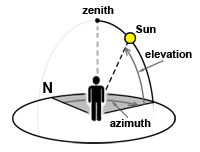

### 2.2) Calculate AOS/LOS events for first contact with the ground station ( min. elevation level 10deg) 

### 2.3) Calculate first pass culmination event time and culmination elevation.


AOS stands for Acquisition of Signal (or Satellite). AOS is the time that a satellite rises above the horizon of an observer.

TCA stands for Time of Closest Approach. This is the time when the satellite is closest to the observer and when Doppler shift is zero. This usually corresponds to the time that the satellite reaches maximum elevation above the horizon.

LOS stands for Loss of Signal (or Satellite). LOS is the time that a satellite passes below the observer’s horizon.

Ground station and imaging target are located at
55N.latitude, 37 E.longitude unless specified otherwise

this is Moscow

In [28]:
lon_gs, lat_gs, alt_gs = 55, 37, 0  # ground station
dt_gs = datetime(2019, 1, 30, 0, 0, 0)  # ground station
print(dt, 10, lon_gs, lat_gs, alt_gs)

2019-01-30 00:00:00 10 55 37 0


In [38]:
next_passes = orb.get_next_passes(dt, 2, lon_gs, lat_gs, alt_gs, tol=0.001, horizon=15)
print("Answer: rise-time, fall-time, max-elevation-time")
next_passes

Answer: rise-time, fall-time, max-elevation-time


[(datetime.datetime(2019, 1, 30, 1, 37, 49, 642676),
  datetime.datetime(2019, 1, 30, 1, 42, 51, 470050),
  datetime.datetime(2019, 1, 30, 1, 40, 20, 896087))]

In [41]:
dt23 = datetime(2019, 1, 30, 1, 42, 51, 470050)
lon_gs, lat_gs, alt_gs = 55, 37, 0  # ground station
topocentric23 = orb.get_observer_look(dt23, lon_gs, lat_gs, alt_gs)
print('Culmination elevation is, degree: ', "%.2f" % topocentric[1])

Culmination elevation is, degree:  -89.84


In [33]:
?? orb.get_next_passes

#    def get_next_passes(self, utc_time, length, lon, lat, alt, tol=0.001, horizon=0):
#         """Calculate passes for the next hours for a given start time and a
#         given observer.

#         Original by Martin.

#         utc_time: Observation time (datetime object)
#         length: Number of hours to find passes (int)
#         lon: Longitude of observer position on ground (float)
#         lat: Latitude of observer position on ground (float)
#         alt: Altitude above sea-level (geoid) of observer position on ground (float)
#         tol: precision of the result in seconds
#         horizon: the elevation of horizon to compute risetime and falltime.

#         Return: [(rise-time, fall-time, max-elevation-time), ...]

roll alngle on sat is an accident angle

## Seminar

Presentation
https://github.com/Geoalert/presentation/tree/master/docs

https://platform.digitalglobe.com/gbdx/

google earth engine

https://demo.aeronetlab.space/dashboard

https://search.kosmosnimki.ru

https://discover.digitalglobe.com

https://www.planet.com/explorer/

https://scihub.copernicus.eu/dhus/#/home

https://scihub.copernicus.eu

http://step.esa.int/main/

https://qgis.org/ru/site/forusers/download.html



Install virtual env and another version of python

https://stackoverflow.com/questions/41535881/how-do-i-upgrade-to-python-3-6-with-conda

https://stackoverflow.com/questions/5506110/is-it-possible-to-install-another-version-of-python-to-virtualenv

https://stackoverflow.com/questions/23842713/using-python-3-in-virtualenv

### 2.4) Calculate first 5 imaging events schedule for the target. Imaging incidence angle < 30deg.

In [53]:
# +- 30 degr from nadir
next_passes = orb.get_next_passes(dt, 180, lon_gs, lat_gs, alt_gs, tol=0.001, horizon=60)
print("Answer: rise-time, fall-time, max-elevation-time")
next_passes

Answer: rise-time, fall-time, max-elevation-time


[(datetime.datetime(2019, 1, 31, 2, 50, 7, 354553),
  datetime.datetime(2019, 1, 31, 2, 52, 2, 265688),
  datetime.datetime(2019, 1, 31, 2, 51, 4, 857641)),
 (datetime.datetime(2019, 1, 31, 14, 6, 9, 208654),
  datetime.datetime(2019, 1, 31, 14, 7, 34, 937965),
  datetime.datetime(2019, 1, 31, 14, 6, 52, 73310)),
 (datetime.datetime(2019, 2, 1, 13, 37, 24, 151225),
  datetime.datetime(2019, 2, 1, 13, 38, 21, 659923),
  datetime.datetime(2019, 2, 1, 13, 37, 52, 905574)),
 (datetime.datetime(2019, 2, 4, 2, 33, 44, 647755),
  datetime.datetime(2019, 2, 4, 2, 35, 18, 119998),
  datetime.datetime(2019, 2, 4, 2, 34, 31, 417543)),
 (datetime.datetime(2019, 2, 4, 13, 49, 19, 838089),
  datetime.datetime(2019, 2, 4, 13, 51, 17, 58477),
  datetime.datetime(2019, 2, 4, 13, 50, 18, 401248))]